## Maximum Likelihood Estimation (MLE-Frquentist)

Let's say we have a distribution given some data and some parameters. Given that some data is observed, which parameters are most likely giving us what we are observing?

We are interested in finding the parameters that make the data the most likely to exist.

$\theta = argmax_{\theta}(P(D;\theta))$

We solve this maximization problem by:
1. Getting the log of the probability(likelihood) after we plug in the terms for the distribution
2. Get maxima by computing the derivative and equating it into zero.

Drawbacks:
1. MLE can overfit data if n is small. 
2. Assumption of the model is wrong, MLE can be very wrong as well.

## Maximum a Posteriori Probability Estimation (MAP-Bayesian)

$\theta = argmax_{\theta}(P(\theta|D))$

## Naive-Bayes

Original Task: predict P(y|x). Tackle it by taking Bayes' Rule of P(y|x)

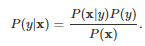

Assumption: Features are independent of each other given the labels.

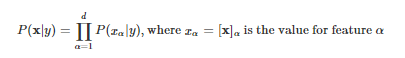

Since features are independent of each other, we can compute individual probabilities of x's given class y, and take the product of it. 

Since

$P(y|x) \propto P(x|y)P(y)$

We can just compute $P(x|y)P(y)$ and ignore the denominator. Largely because computing P(x) is troublesome.

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Load Dataset
data = load_iris()
x = data['data']
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8)

In [5]:
class Naive_Bayes:
    def __init__(self, prior="Gaussian") -> None:
        self.prior = prior

    def fit(self, X, y):
        m, n = X.shape
        self.X = X
        self.y = y
        self.table = self.separate_by_class(X,y)
        self.statistics={}
        if self.prior == 'Gaussian':
            for key, value in self.table.items():
                mean = np.mean(value, axis=0)
                std_dev = np.std(value, axis=0)
                self.statistics[key] = {
                    'mean': mean,
                    'std_dev': std_dev
                }
    
    def calculate_probability(self, X, mean, std_dev):
        # calculate probability of P(X|y)
        # return value 
        return np.log((1/(np.sqrt(2*np.pi)*std_dev))*np.exp(-((X-mean)**2)/(2*std_dev**2)))
    
    def predict(self,X):
        # calculate probability of each class
        class_sum = [len(value) for _ ,value in self.table.items()]
        class_prob = class_sum/np.sum(class_sum)
        # calculate posterior probability
        class_probabilities = []
        for key in range(len(self.statistics)):
            value = self.statistics[key]
            mean = value["mean"]
            std_dev = value["std_dev"]
            log_probabilities = self.calculate_probability(X, mean, std_dev)
            class_probabilities.append(log_probabilities)
        # extract 
        for index, prob in enumerate(class_probabilities):
            class_probabilities[index] = np.sum(prob, axis=1)+np.log(class_prob[index])
        labels = np.argmax(class_probabilities, axis=0)
        return labels

    def separate_by_class(self,X,y):
        separated = dict()
        for i in range(len(X)):
            feature = X[i]
            target = y[i]
            if target not in separated:
                separated[target] = []
            separated[target].append(feature)
        return separated

In [6]:
model = Naive_Bayes()
model.fit(x_train,y_train)
out = model.predict(x_test)
print(classification_report(out, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.89      0.94         9
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [7]:
from sklearn.naive_bayes import GaussianNB


model = GaussianNB()
model.fit(x_train,y_train)
out = model.predict(x_test)
print(classification_report(y_test, out))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

